**Loading all libraries and dataset required**

In [166]:
#Loading libraries Required
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import xgboost as xgb
from xgboost import cv
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

#Loading dataset
df=pd.read_csv('/content/drive/MyDrive/VackerGlobal/Lead Scoring.csv')

**Dealing with NULL values**

In [167]:
#values in fillna is either most common occurence to replace null or mean of continous feature
df['TotalVisits']=df['TotalVisits'].fillna(3.45)
df['Page Views Per Visit']=df['Page Views Per Visit'].fillna(2.36)
df['Last Activity']=df['Last Activity'].fillna('Email Opened')
df['Country']=df['Country'].fillna('India')
df['Specialization']=df['Specialization'].fillna('Select')
df['How did you hear about X Education']=df['How did you hear about X Education'].fillna('Select')
df['What is your current occupation']=df['What is your current occupation'].fillna('Unemployed')
df['What matters most to you in choosing a course']=df['What matters most to you in choosing a course'].fillna('Better Career Prospects')
df['Tags']=df['Tags'].fillna('Will revert after reading the email')
df['Lead Quality']=df['Lead Quality'].fillna('Might be')
df['Lead Profile']=df['Lead Profile'].fillna('Select')
df['City']=df['City'].fillna('Mumbai')
df['Asymmetrique Activity Index']=df['Asymmetrique Activity Index'].fillna('02.Medium')
df['Asymmetrique Profile Index']=df['Asymmetrique Profile Index'].fillna('02.Medium')
df['Asymmetrique Activity Score']=df['Asymmetrique Activity Score'].fillna(14.3)
df['Asymmetrique Profile Score']=df['Asymmetrique Profile Score'].fillna(16.3)



**Splitting data**

In [168]:
#Dropping features which does not play any role in deciding target variable
df=df.drop(['Prospect ID'], axis=1)
df=df.drop(['Lead Number'], axis=1)


In [169]:
#Separating target variable from dataset
y = df['Converted']
df=df.drop(['Converted'], axis=1)
x=df

In [170]:
#Splitting Dataset
x_train,x_test, y_train, y_test = train_test_split(x, y,shuffle=True)

**Preprocessing Data**

In [171]:

transformer = make_column_transformer(
    (StandardScaler(),['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Asymmetrique Activity Score','Asymmetrique Profile Score']),
    (OneHotEncoder(handle_unknown='ignore'), ['Lead Origin','Lead Source','Do Not Email','Do Not Call','Last Activity','Country','Specialization',
                                   'How did you hear about X Education','What is your current occupation',
                                   'What matters most to you in choosing a course','Search','Magazine','Newspaper Article',
                                   'X Education Forums','Newspaper','Digital Advertisement','Through Recommendations',
                                   'Receive More Updates About Our Courses','Tags','Lead Quality','Update me on Supply Chain Content',
                                   'Get updates on DM Content','Lead Profile','City','Asymmetrique Activity Index','Asymmetrique Profile Index',
                                   'I agree to pay the amount through cheque','A free copy of Mastering The Interview',
                                   'Last Notable Activity']),remainder='passthrough')
#Data for Single model Training
x_train = transformer.fit_transform(x_train)
x_test=transformer.transform(x_test)

#Data for cross validation
x = transformer.fit_transform(x)



**Model Training**

In [172]:
#Single Model Training
# declare parameters

          
# instantiate the classifier 
xgb_model = XGBClassifier(n_estimators=200,max_depth=5,colsample_bytree= 0.4)

# fit the classifier to the training data
xgb_model.fit(x_train, y_train)

y_pred=xgb_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 93.59%


**Cross-Validation (Please see through results Completely)**

In [173]:
# define data_dmatrix
data_dmatrix = xgb.DMatrix(data=x,label=y)


params = {"objective":"binary:logistic",'colsample_bytree': 0.4,'learning_rate': 1,
                'max_depth': 5, 'alpha': 10}

xgb_cv = cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50, early_stopping_rounds=10, metrics="auc", as_pandas=True, seed=123)
print(xgb_cv)

#IMPORTANT
#following results contains cross-validation model training results

    train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0         0.841733       0.001738       0.836058      0.008952
1         0.928306       0.010881       0.926069      0.012118
2         0.951656       0.004045       0.948921      0.001422
3         0.964145       0.004660       0.961899      0.003781
4         0.969930       0.004989       0.966693      0.003414
5         0.972996       0.003660       0.969150      0.002791
6         0.975565       0.001830       0.971175      0.001017
7         0.976683       0.001802       0.971299      0.000714
8         0.977390       0.001689       0.972082      0.000537
9         0.978176       0.001556       0.972991      0.000542
10        0.979258       0.001387       0.974047      0.000374
11        0.979706       0.001403       0.974128      0.000393
12        0.980257       0.001393       0.974466      0.000404
13        0.980724       0.001309       0.974817      0.000167
14        0.980898       0.001228       0.974924      0

**Plotting Graph With 97.57% of Testing Accuracy**

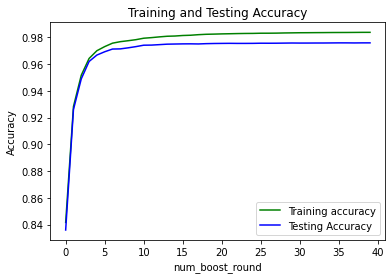

In [177]:

plt.plot(xgb_cv['train-auc-mean'], 'g', label='Training accuracy')

plt.plot(xgb_cv['test-auc-mean'], 'b', label='Testing Accuracy')

plt.title('Training and Testing Accuracy')

plt.xlabel('num_boost_round')

plt.ylabel('Accuracy')

plt.legend()

plt.show()
plt.show()